# Model Fitting - XGBoost
Fit the XGBoost model using the training dataset. XGBoost is faster and has potentially better accuracy. This allow me to use more features and test changes faster.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib.lines import Line2D
import joblib

from src.data.labels_util import load_labels, LabelCol, get_labels_file, load_clean_labels, get_workouts
from src.data.imu_util import (
    get_sensor_file, ImuCol, load_imu_data, Sensor, fix_epoch, resample_uniformly, time_to_row_range, get_data_chunk,
    normalize_with_bounds, data_to_features, list_imu_abspaths, clean_imu_data
)
from src.data.util import find_nearest, find_nearest_index, shift, low_pass_filter, add_col
from src.data.workout import Activity, Workout
from src.data.data import DataState
from src.data.build_features import main as build_features
from src.data.features_util import list_test_files
from src.model.train import evaluate_model_accuracy, train_model, create_xgboost
from src.model.predict import evaluate_on_test_data, evaluate_on_test_data_plot
from src.visualization.visualize import multiplot
from src.config import (
    TRAIN_BOOT_DIR, TRAIN_POLE_DIR, TRAIN_FEATURES_FILENAME, TRAIN_LABELS_FILENAME, BOOT_MODEL_FILE, 
    POLE_MODEL_FILE
)

# import data types
from pandas import DataFrame
from numpy import ndarray
from typing import List, Tuple, Optional

### Evaluate quality of model and training data

In [2]:
# UNCOMMENT to use. It's very slow.

# print('Boot model:')
# features: ndarray = np.load(TRAIN_BOOT_DIR / TRAIN_FEATURES_FILENAME)
# labels: ndarray = np.load(TRAIN_BOOT_DIR / TRAIN_LABELS_FILENAME)
    
# evaluate_model_accuracy(features, labels, create_xgboost())

In [3]:
# print('Pole model:')
# features: ndarray = np.load(TRAIN_POLE_DIR / TRAIN_FEATURES_FILENAME)
# labels: ndarray = np.load(TRAIN_POLE_DIR / TRAIN_LABELS_FILENAME)
    
# evaluate_model_accuracy(features, labels)

### Train model

In [4]:
print('Train boot model:')
# train_model(Activity.Boot, create_xgboost())

Train boot model:


In [5]:
print('Train pole model:')
# train_model(Activity.Pole, create_xgboost())

Train pole model:


### Test model

Test boot model:


<IPython.core.display.Javascript object>


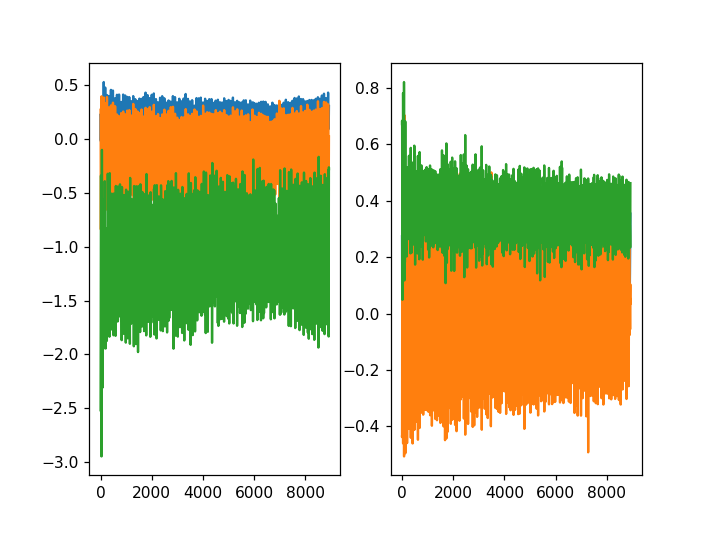

Accuracy: 0.874538
              precision    recall  f1-score   support

   Non-steps       0.93      0.85      0.89      5198
       Steps       0.82      0.91      0.86      3729

    accuracy                           0.87      8927
   macro avg       0.87      0.88      0.87      8927
weighted avg       0.88      0.87      0.88      8927

Accuracy: 0.878319
              precision    recall  f1-score   support

   Non-steps       0.86      0.95      0.91      5532
       Steps       0.91      0.75      0.82      3393

    accuracy                           0.88      8925
   macro avg       0.89      0.85      0.87      8925
weighted avg       0.88      0.88      0.88      8925



In [6]:
print('Test boot model:')
evaluate_on_test_data_plot(Activity.Boot, False, test_idx=None)

Test pole model:


<IPython.core.display.Javascript object>


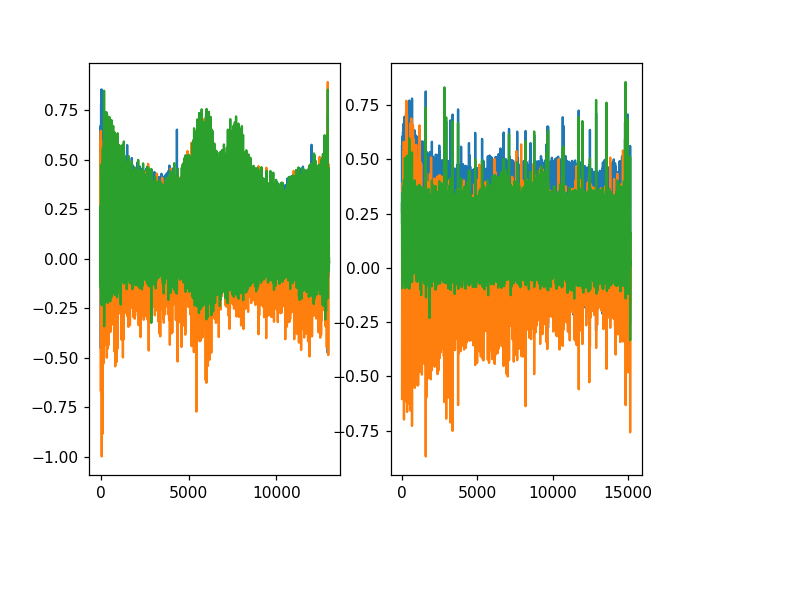

Accuracy: 0.979208
              precision    recall  f1-score   support

   Non-steps       0.98      0.97      0.97      4908
       Steps       0.98      0.99      0.98      8078

    accuracy                           0.98     12986
   macro avg       0.98      0.98      0.98     12986
weighted avg       0.98      0.98      0.98     12986

Accuracy: 0.980219
              precision    recall  f1-score   support

   Non-steps       0.99      0.97      0.98      6147
       Steps       0.98      0.99      0.98      9019

    accuracy                           0.98     15166
   macro avg       0.98      0.98      0.98     15166
weighted avg       0.98      0.98      0.98     15166



In [7]:
print('Test pole model:')
evaluate_on_test_data_plot(Activity.Pole, False, test_idx=None)